In [ ]:
!pip install mlxtend

In [ ]:
import pandas as pd
import numpy as np

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules





In [ ]:
dataset=[]
import csv
with open("/content/Association Rule mining datasets_Market_Basket_Optimisation.csv") as file:
  reader = csv.reader(file,delimiter=" ")
  for row in reader:
    dataset+=[row]

In [ ]:
dataset

[['shrimp,almonds,avocado,vegetables',
  'mix,green',
  'grapes,whole',
  'weat',
  'flour,yams,cottage',
  'cheese,energy',
  'drink,tomato',
  'juice,low',
  'fat',
  'yogurt,green',
  'tea,honey,salad,mineral',
  'water,salmon,antioxydant',
  'juice,frozen',
  'smoothie,spinach,olive',
  'oil'],
 ['burgers,meatballs,eggs'],
 ['chutney'],
 ['turkey,avocado'],
 ['mineral', 'water,milk,energy', 'bar,whole', 'wheat', 'rice,green', 'tea'],
 ['low', 'fat', 'yogurt'],
 ['whole', 'wheat', 'pasta,french', 'fries'],
 ['soup,light', 'cream,shallot'],
 ['frozen', 'vegetables,spaghetti,green', 'tea'],
 ['french', 'fries'],
 ['eggs,pet', 'food'],
 ['cookies'],
 ['turkey,burgers,mineral', 'water,eggs,cooking', 'oil'],
 ['spaghetti,champagne,cookies'],
 ['mineral', 'water,salmon'],
 ['mineral', 'water'],
 ['shrimp,chocolate,chicken,honey,oil,cooking', 'oil,low', 'fat', 'yogurt'],
 ['turkey,eggs'],
 ['turkey,fresh',
  'tuna,tomatoes,spaghetti,mineral',
  'water,black',
  'tea,salmon,eggs,chicken,ext

In [ ]:
len(dataset)

7501

In [ ]:
te=TransactionEncoder()
x=te.fit_transform(dataset)

In [ ]:
x

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
df=pd.DataFrame(x,columns=te.columns_)

In [ ]:
freq_itemset=apriori(df,min_support=0.01)

In [ ]:
freq_itemset

,support,itemsets
0,0.049460,(0)
1,0.021464,(87)
2,0.020797,(335)
3,0.014531,(487)
4,0.028929,(617)
5,0.020797,(926)
6,0.017731,(1018)
7,0.013598,(1302)
8,0.029729,(1471)
9,0.020931,(1492)


In [ ]:
rules=association_rules(freq_itemset,metric='confidence',min_threshold=0.30)

In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(0),(2066),0.049460,0.030929,0.030929,0.625337,20.218329,1.0,0.029399,2.586513,1.000000,0.625337,0.613379,0.812668
1,(2066),(0),0.030929,0.049460,0.030929,1.000000,20.218329,1.0,0.029399,inf,0.980878,0.625337,1.000000,0.812668
2,(3280),(1492),0.012932,0.020931,0.010265,0.793814,37.926128,1.0,0.009995,4.748487,0.986389,0.435028,0.789407,0.642130
3,(1492),(3280),0.020931,0.012932,0.010265,0.490446,37.926128,1.0,0.009995,1.937122,0.994447,0.435028,0.483770,0.642130
4,(1705),(5723),0.076523,0.072390,0.068391,0.893728,12.345958,1.0,0.062851,8.728655,0.995154,0.849338,0.885435,0.919240
5,(5723),(1705),0.072390,0.076523,0.068391,0.944751,12.345958,1.0,0.062851,16.714931,0.990720,0.849338,0.940173,0.919240
6,(1759),(1761),0.034929,0.063058,0.017864,0.511450,8.110760,1.0,0.015662,1.917803,0.908438,0.222962,0.478570,0.397374
7,(1995),(3942),0.020531,0.107052,0.011865,0.577922,5.398498,1.0,0.009667,2.115599,0.831841,0.102535,0.527321,0.344378
8,(4711),(2300),0.024397,0.076923,0.012398,0.508197,6.606557,1.0,0.010522,1.876923,0.869857,0.139430,0.467213,0.334688
9,(3101),(5508),0.012798,0.085989,0.012265,0.958333,11.144897,1.0,0.011165,21.936275,0.922074,0.141757,0.954413,0.550484


In [ ]:
df.columns

Index(['&', 'accessories', 'accessories,antioxydant',
       'accessories,champagne,fresh', 'accessories,champagne,protein',
       'accessories,chocolate', 'accessories,chocolate,champagne,frozen',
       'accessories,chocolate,frozen', 'accessories,chocolate,low',
       'accessories,chocolate,pasta,salt',
       ...
       'yams,frozen', 'yams,melons', 'yams,mineral', 'yams,mint', 'yogurt',
       'yogurt,candy', 'yogurt,green', 'yogurt,honey', 'yogurt,mint',
       'yogurt,zucchini'],
      dtype='object', length=5729)

In [ ]:
df.head(2)

,&,accessories,"accessories,antioxydant","accessories,champagne,fresh","accessories,champagne,protein","accessories,chocolate","accessories,chocolate,champagne,frozen","accessories,chocolate,frozen","accessories,chocolate,low","accessories,chocolate,pasta,salt",...,"yams,frozen","yams,melons","yams,mineral","yams,mint",yogurt,"yogurt,candy","yogurt,green","yogurt,honey","yogurt,mint","yogurt,zucchini"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
rules=rules[['antecedents','consequents','support','confidence']]

In [ ]:
rules=[rules['antecedents']=={'cake'}]

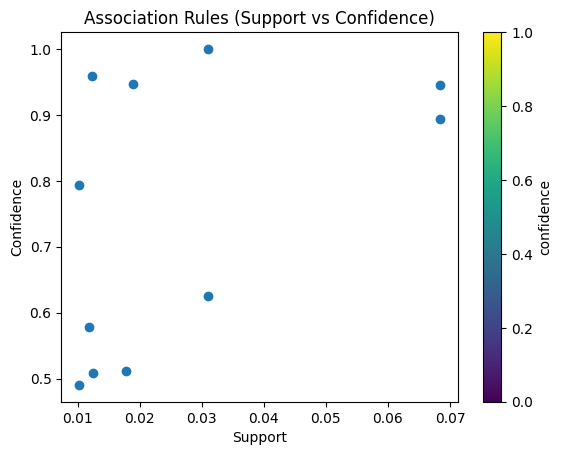

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'])
plt.colorbar(label='confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules (Support vs Confidence)')
plt.show()
